Combine what you have learned in Sections 1 to 4, and write a program that:
1. Given d, p, visualizes a histogram of the eigenvalues of an adjacency matrix of an Erdos–Renyi random graph.
2. Given d, m, n, p, Σ, estimates a good upper bound for ∥Sn,free∥ using Exercise 6.
3. Given d, m, n, p, estimates a good upper bound for ∥Sn,free∥ using Exercise 7.

Also program several Python tests that:
1. Check (mathematical) validity / accuracy of the functions that you programmed in Exercises 3–7. Then:
a. For d = 20 and q = 0.3, visualize an Erd ̋os–R ́enyi random graph with p(d) = q.
b. For d ∈ {100, 1000} and q ∈ {0.2, 0.5, 0.8}, visualize histograms of eigenvalues of the matrices A − p(d)(Jd −Id), where each time A ∈ {0, 1}d×d is the adjacency matrix of an Erdo ̋s–R ́enyi random graph with p(d) = q.
c. For d = 10, n = 1, q = 0.7, Σ = Id, conduct an experiment to choose a suitable sample size m for Tasks 2 and 3 (those based on Exercises 6 and 7), when the X1, . . . , Xn are adjacency matrices of Erd ̋os–R ́enyi random graphs with p(d) = q. Comment on which implementation is more efficient as a function of m.

d. For d=10,m=100,Σ=Id,n∈{1,10,100},q∈{0.05,0.15,...,0.95},create a 3×9 table displaying your upper bound for ∥Sn,free∥ with confidence intervals as a function of (n, p), when the X1, . . . , Xn are adjacency matrices of Erdo ̋s–R ́enyi random graphs with p(d) = q.5
4 If you would like to test your code, consider that the identity matrix Id is an example of a positive definite matrix. Another example is MTM, where M can be any real invertible matrix.
5When calculating a confidence interval or confidence band, you may at that moment use a Python library for calculating means or variances.
  3
e. Make sure that you create enough independent replications of your simulation so that all values within your tables have at least two significant digits, e.g. 1.2 ± 0.3 or 45 ± 6. We consider three significant digits very impressive, e.g. 7.89 ± 0.01, but this requires efficient programming. Here, the first number indicates your estimated sample mean and the second number indicates your confidence interval.
f. For d = 100, let A be the adjacency matrix of an Erd ̋os–R ́enyi random graph with p(d) = (ln d)α/d. For α∈(0,4),estimateE[∥A−p(d)(J −I )∥ ]and∥(A−p(d)(J −I )) ∥. Let us call your estimatesξˆd d 2 d d free
and ζˆ , respectively. Create (α, ξˆ )- and (α, ζˆ )-plots with coinfidence bands.
α
g. Conduct one extra scientific experiment on either Erdos–Renyi random graphs or (sums of) random matrices. You may choose what to investigate! Try to consult a wide array of sources for inspiration / background, and cite several. Here are a few suggestions, which you may freely ignore:
• depending on whether p(d) < ln d/d, p(d) = ln d/d, or p(d) > ln d/d, a large Erd ̋os–R ́enyi random graph (d → ∞) can either have, or not have, one unique ‘giant component’;
• surprisingly, the empirical eigenvalue distribution of a large random matrix is almost always semicir- cular, irrespective of the underlying distribution;
• however, the empirical eigenvalue distribution of random matrices drawn from the Wishart distribution have a related but slightly different shape.


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

rng = np.random.default_rng()


def erdosRenyiGen(d, p):                #generate symmetrical binomial_p(0, 1) matrices
    matrix = rng.binomial(1, p, [d, d])   #with 0's on the diagonal, dimension dxd
    for j in range(1, d):
        for i in range(j):
            matrix[i][j] = 0
    i_d = np.identity(d)
    j_d = np.ones(d)
    matrix = matrix * (j_d - i_d)
    matrix += np.transpose(matrix)
    return matrix

def graphFromNetwork(a, d, title):             #generate a network graph from dxd matrix A
    network = nx.Graph()
    for j in range(d):
        network.add_node(j+1)
        for i in range(j):
            if i < j:
                if a[i][j] == 1:
                    network.add_edge(i+1,j+1)
    nx.draw_circular(network)
    plt.title(title)
    plt.show()


def printHist(x, title, xlabel, ylabel):  #generate histogram of x with title,
    plt.hist(x, bins=20)                    #xlabel and ylabel
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


def zi6Gen(d, sig):                       #generate dxd positive generate matrix
    g = np.zeros((d, d))                    #using multivariate normal
    for i in range(d):
        g[i] = rng.multivariate_normal([0] * d, sig)
    zi = np.zeros((d, d))
    for i in range(d):
        zi += g[i] * g[i][:,np.newaxis]
    return zi


def zi7AGen(d):                           #generate dxd positive definite matrix
    diagMatrix = np.identity(d)             #using congruency with diagonal matrices
    congruencyMatrix = np.zeros([d, d])
    for i in range(d):
        for j in range(d):
            congruencyMatrix[i][j] = rng.uniform(0, 1)
    zi = np.dot(np.dot(np.transpose(congruencyMatrix), diagMatrix), congruencyMatrix)
    return zi


def zi7BGen(d):                           #generate dxd positive definite matrix
    Matrix = rng.uniform(0, 1, [d, d])      #using the properties of its eigenvalues
    while np.linalg.det(Matrix) == 0:
        Matrix = rng.uniform(0, 1, [d, d])
    zi = np.dot(Matrix, Matrix.transpose())
    return zi


def mu_nEstimator(d, n, p):               #calculate average entries of n dxd matrices
    x = np.zeros((n, d, d))                 #with each non-diagonal entry binomial_p(0, 1)
    for i in range(n):                      #and the diagonal entries 0's
        x[i] = erdosRenyiGen(d, p)
    mu_n = np.sum(x, axis=0)
    return mu_n


def esn_nCalculator(d, p):                #generate average of dxd matrix with
    j_d = np.ones(d)                        #each non-diagonal entry binomal_p(0, 1)
    i_d = np.identity(d)                    #and the diagonal entries 0's
    esn_n = p * (j_d - i_d)
    return esn_n


def ups_nEstimator(d, n, p, mu_n, zi):    #calculate upsilon_n for dxd matrix mu_n
    esn_n = esn_nCalculator(d, p)           #generated with p, n using identity matrix zi
    ups_n = np.dot(np.dot(np.transpose(esn_n * n - mu_n), zi), (esn_n * n - mu_n))
    return ups_n


def snFree6Estimator(d, m, n, p, sig):    #estimate the free spectral norm of S_n
    snFree6 = np.zeros(2)                   #using zi6Gen
    for eta in (-1, 1):
        eigenValues = np.zeros(m)
        for i in range(m):
            zi = zi6Gen(d, sig)
            mu_n = mu_nEstimator(d, n, p)
            ups_n = ups_nEstimator(d, n, p, mu_n, zi)
            summation = np.linalg.inv(zi) + eta * mu_n + ups_n
            eigenValues[i] = np.amax(summation)
        j = int((eta + 1) / 2)
        snFree6[j] = np.amin(eigenValues)
    return np.amax(snFree6)


def snFree7AEstimator(d, m, n, p):        #estimate the free spectral norm of S_n
    snFree7 = np.zeros(2)                  #using zi7AGen
    for eta in (-1, 1):
        eigenValues = np.zeros(m)
        for i in range(m):
            zi = zi7AGen(d)
            mu_n = mu_nEstimator(d, n, p)
            ups_n = ups_nEstimator(d, n, p, mu_n, zi)
            summation = np.linalg.inv(zi) + eta * mu_n + ups_n
            eigenValues[i] = np.amax(summation)
        j = int((eta + 1) / 2)
        snFree7[j] = np.amin(eigenValues)
    return np.amax(snFree7)


def snFree7BEstimator(d, m, n, p):        #estimate the free spectral norm of S_n
    snFree7 = np.zeros(2)                   #using zi7BGen
    for eta in (-1, 1):
        eigenValues = np.zeros(m)
        for i in range(m):
            zi = zi7BGen(d)
            mu_n = mu_nEstimator(d, n, p)
            ups_n = ups_nEstimator(d, n, p, mu_n, zi)
            summation = np.linalg.inv(zi) + eta * mu_n + ups_n
            eigenValues[i] = np.amax(summation)
        j = int((eta + 1) / 2)
        snFree7[j] = np.amin(eigenValues)
    return np.amax(snFree7)

In [ ]:
# Validity / Accuracy tests
import pytest as pytest

#3
def test_exp_est():
    d = 20
    n = 100
    p = 0.3
    estimate_expectation = mu_nEstimator(d, n, p) / n
    test_quantity = esn_nCalculator(d, p)
    assert np.allclose(estimate_expectation, test_quantity, atol = 0.1), "test failed"

#4&5: assertion already done by functions
def estimateUps_n(z, mu_n, es_n_n, n): #exercise 4
    assert np.all(np.linalg.eigvals(Z) > 0)
    ups_n = np.dot(np.dot(np.transpose(es_n_n * n - mu_n), z), (es_n_n * n - mu_n))
    return ups_n

def exercise5(z, eta, mu_n, ups_n): #exercise 5
    assert np.all(np.linalg.eigvals(Z) > 0)
    matrix = np.linalg.inv(z) + eta * mu_n + ups_n
    eigen = np.linalg.eig(matrix)[0]
    return np.max(eigen)

#6
def test_zi6Gen_pos_def():
    d = 4
    sig = [[2,0,0,0],[0,2,0,0],[0,0,5,0],[0,0,0,8]]
    z_i = zi6Gen(d, sig)
    assert np.all(np.linalg.eigvals(z_i) > 0), "test failed"

#7
def test_zi7AGen_pos_def():
    d = 20
    z_i = zi7AGen(d)
    assert np.all(np.linalg.eigvals(z_i) > 0), "test failed"

def test_zi7BGen_pos_def():
    d = 20
    z_i = zi7BGen(d)
    assert np.all(np.linalg.eigvals(z_i) > 0), "test failed"

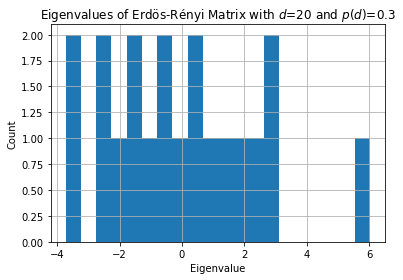

In [ ]:
#set arbitrary starting variables
p = 0.3
d = 20
m = 10
n = 100
sig = np.identity(d)

#Deliverable 1
erdosRenyiMatrix = erdosRenyiGen(d, p)
erdosRenyiEigVals = np.linalg.eigvals(erdosRenyiMatrix)
title = 'Eigenvalues of Erdös-Rényi Matrix with $d$=' + str(d) + ' and $p(d)$=' + str(p)
xlabel = 'Eigenvalue'
ylabel = 'Count'
printHist(erdosRenyiEigVals, title, xlabel, ylabel)

In [ ]:
#Deliverable 2
print('Estimate for ||Sn,free|| using the method from exercise 6: ' + str(snFree6Estimator(d, m, n, p, sig)))

Estimate for ||Sn,free|| using the method from exercise 6: 12073.045649481102


In [ ]:
#Deliverable 3
print('Estimate for ||Sn,free|| using the method A from exercise 7: ' + str(snFree7AEstimator(d, m, n, p)))
print('Estimate for ||Sn,free|| using the method B from exercise 7: ' + str(snFree7BEstimator(d, m, n, p)))

Estimate for ||Sn,free|| using the method A from exercise 7: 5144.634616276314
Estimate for ||Sn,free|| using the method B from exercise 7: 7197.0762092613595


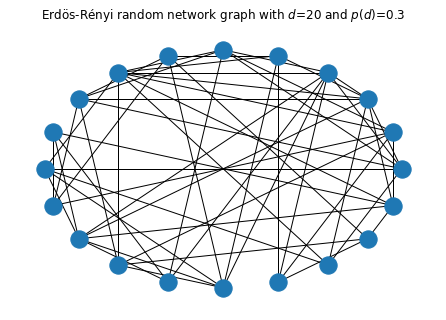

In [ ]:
#Deliverable A
#set specific starting variables
d = 20
q = 0.3

ERMatrix = erdosRenyiGen(d, q)    #generate random network matrix
title = 'Erdös-Rényi random network graph with $d$=' + str(d) + ' and $p(d)$=' + str(q)
graphFromNetwork(ERMatrix, d, title)     #convert network matrix to graph

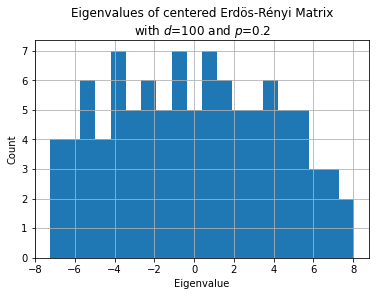

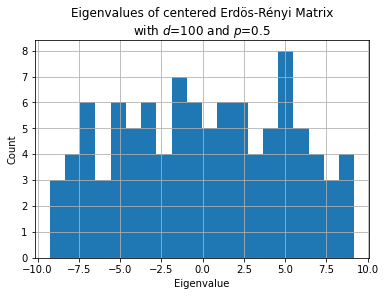

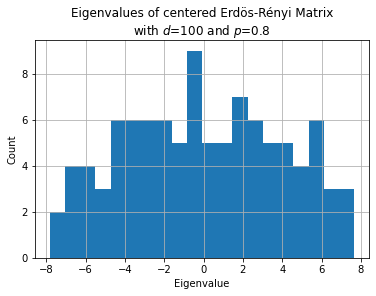

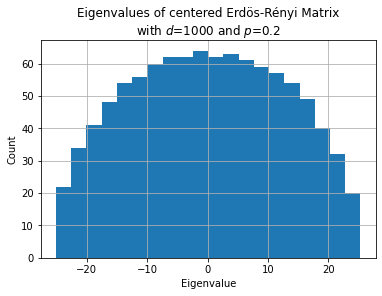

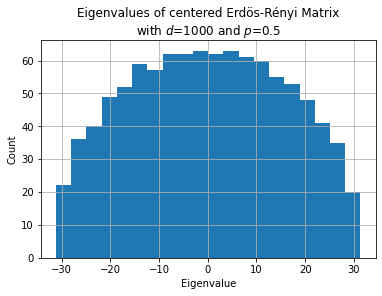

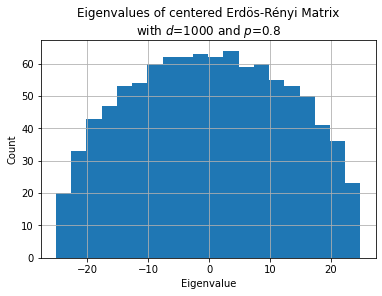

In [ ]:
#Deliverable B
#set specific starting variables
d = ([100, 1000])
p = ([0.2, 0.5, 0.8])

for di in d:
    for pi in p:
        #for each d and p, generate, normalise and get eigenvalues of network matrix
        erdosRenyiMatrix = erdosRenyiGen(di, pi)
        j_d = np.ones((di, di))
        i_d = np.identity(di)
        centeredErdosRenyi = erdosRenyiMatrix - pi * (j_d - i_d)
        centeredErdosRenyiEigVals = np.linalg.eigvals(centeredErdosRenyi)

        #generate histogram of eigenvalues of network matrix
        title = 'Eigenvalues of centered Erdös-Rényi Matrix\nwith $d$=' + str(di) + ' and $p$=' + str(pi)
        xlabel = 'Eigenvalue'
        ylabel = 'Count'
        printHist(centeredErdosRenyiEigVals, title, xlabel, ylabel)

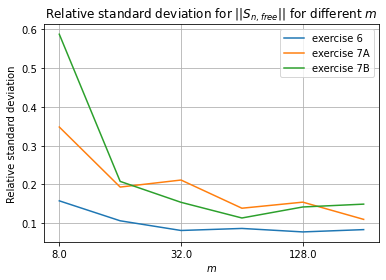

In [ ]:
#Deliverable C
#set specific starting variables
d = 10
n = 1
p = 0.7
sig = np.identity(d)

#variables specific for checking accuracy of ||S_n,Free|| estimate
count = 1000      #runs for calculation variance
min = 3           #actual min and max are 2^min and 2^max
max = 11          #higher value increases chance to find asymptote

exercise = ['6', '7A', '7B']
methods = np.alen(exercise)
err = np.zeros((methods, max + 1 - min))
xvalues = 2**np.linspace(min, max, num=max + 1 - min)   #only check powers of 2 for m
results = np.zeros(count)

for method in range(methods):
    for i in range(min, max + 1):
        m = 2 ** i
        if method == 0:
            for j in range(count):    #inside method selector to increase speed
                results[j] = snFree6Estimator(d, m, n, p, sig)
        elif method == 1:
            for j in range(count):
                results[j] = snFree7AEstimator(d, m, n, p)
        elif method == 2:
            for j in range(count):
                results[j] = snFree7BEstimator(d, m, n, p)
        #use relative standard deviation to determine the error for each m value
        err[method][i - min] = np.std(results) / np.mean(results)

    #generate line for each method for esimating ||S_n,Free||
    label = 'exercise ' + str(exercise[method])
    plt.plot(xvalues, err[method], label=label)

title = r'Relative standard deviation for $||S_{n,free}||$ for different $m$'
plt.title(title)
xlabel = r'$m$'
plt.xlabel(xlabel)
ylabel = 'Relative standard deviation'
plt.ylabel(ylabel)
plt.xscale('log')
plt.xticks(ticks=xvalues[0::2], labels=xvalues[0::2])
plt.minorticks_off()
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Deliverable D&E
#set specific starting variables
d = 10
m = 100
sig = np.identity(d)
n = [1, 10, 100]
q = np.arange(0.05, 1, 0.1)

table = pd.DataFrame(columns=n, index=q)    #create empty table
repetitions = 100       #small nr of reps to estimate how many more to repeat
safetyFactor = 1.25     #used to make sure the required significant digits don't undershoot
reqSigDig = 3           #desired significant digits, >2 greatly increases runtime
for ni in n:
    upperBoundLst = []
    for qi in q:
        sim = np.zeros(repetitions)
        for run in range(repetitions):      #run standard number of simulations
            sim[run] = snFree6Estimator(d, m, ni, qi, sig)

        avgX = np.mean(sim)                 #calculate E[X]
        sd = np.std(sim)                    #estimated standard deviation of E[X]
        ci = 1.96 * sd / np.sqrt(repetitions)

        #determine extra repetitions required
        sigDigAvgX = int(np.floor(np.log10(avgX)))
        sigDigCi = int(np.floor(np.log10(ci)))
        if (sigDigAvgX - sigDigCi) < (reqSigDig - 1):
            repScalar = (ci / (10 ** (sigDigAvgX - reqSigDig + 2)) * safetyFactor) ** 2
            extraReps = int(repetitions * (repScalar - 1))
            sim = np.append(sim, np.zeros(extraReps))
            for run in range(extraReps):          #execute extra simulation steps
                sim[run+repetitions] = snFree6Estimator(d, m, ni, qi, sig)

            avgX = np.mean(sim)                   #update E[X]
            sd = np.std(sim)                      #update standard deviation of E[X]
            ci = 1.96 * sd / np.sqrt(repetitions + extraReps)
            sigDigAvgX = int(np.floor(np.log10(avgX)))
            sigDigCi = int(np.floor(np.log10(ci)))
        upperBound = str(round(avgX, -sigDigCi)) + '±' + str(round(ci, -sigDigCi))
        upperBoundLst.append(upperBound)

    table[ni] = upperBoundLst
print(table)

KeyboardInterrupt: ignored

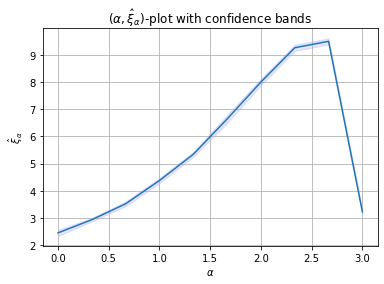

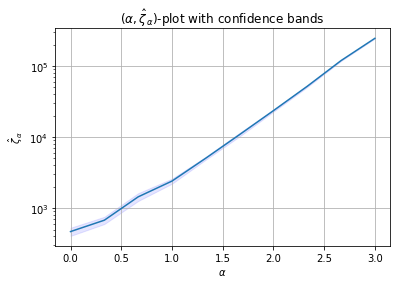

In [ ]:
#Deliverable F
def p_d(d, alpha):      #convert alpha value to chance
    p_d = (np.log(d) ** alpha) / d
    return p_d


def zetaEstimator(d, m, p):   #estimate free spectral norm zeta using zi7AGen
    zeta = np.zeros(2)
    for eta in (-1, 1):
        eigenValues = np.zeros(m)
        for i in range(m):
            zi = zi7AGen(d)
            mu_n = erdosRenyiGen(d, p)
            esn_n = np.zeros((d, d))
            ups_n = np.dot(np.dot(np.transpose(esn_n - mu_n), zi), (esn_n - mu_n))
            summation = np.linalg.inv(zi) + eta * mu_n + ups_n
            eigenValues[i] = np.amax(summation)
        j = int((eta + 1) / 2)
        zeta[j] = np.amin(eigenValues)
    return np.amax(zeta)


#set variables for the graph
repetitions = 5
steps = 31

#set starting variables
d = 100
m = 5
alphaRange = np.linspace(0, 3, steps, endpoint=True)

#prepare data structures
xiMeans = np.zeros(steps)
xiStds = np.zeros(steps)
xiCis = np.zeros(steps)
zetaMeans = np.zeros(steps)
zetaStds = np.zeros(steps)
zetaCis = np.zeros(steps)
xi = np.zeros(repetitions)
zeta = np.zeros(repetitions)

for i in range(steps):
    p = p_d(d, alphaRange[i])
    for n in range(repetitions):
        #calculate xi
        A = erdosRenyiGen(d, p)
        esn = esn_nCalculator(d, p)
        A_centered = A - esn
        xi[n] = np.sqrt(np.max(np.absolute(np.linalg.eigvals(np.dot(np.transpose(A_centered), A_centered)))))

        #calculate zeta
        zeta[n] = zetaEstimator(d, m, p)
    #get estimates and standard deviations
    xiMeans[i] = np.mean(xi)
    xiStds[i] = np.std(xi)
    zetaMeans[i] = np.mean(zeta)
    zetaStds[i] = np.std(zeta)

#calculate confidence intervals
xiCis = 1.96 * xiStds / np.sqrt(repetitions)
zetaCis = 1.96 * zetaStds / np.sqrt(repetitions)

#generate plots
plt.plot(alphaRange, xiMeans)
title = r'($\alpha, \hat\xi_\alpha$)-plot with confidence bands'
plt.title(title)
xlabel = r'$\alpha$'
plt.xlabel(xlabel)
ylabel = r'$\hat\xi_\alpha$'
plt.ylabel(ylabel)
plt.grid(True)
plt.fill_between(alphaRange, (xiMeans - xiCis), (xiMeans + xiCis), color='b', alpha=.1)
plt.show()

plt.plot(alphaRange, zetaMeans)
title = r'($\alpha, \hat\zeta_\alpha$)-plot with confidence bands'
plt.title(title)
xlabel = r'$\alpha$'
plt.xlabel(xlabel)
ylabel = r'$\hat\zeta_\alpha$'
plt.ylabel(ylabel)
plt.yscale('log')
plt.grid(True)
plt.fill_between(alphaRange, (zetaMeans - zetaCis), (zetaMeans + zetaCis), color='b', alpha=.1)
plt.show()

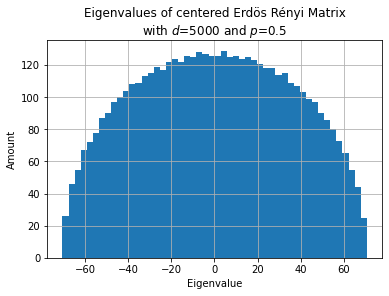

In [ ]:
#Deliverable G
p = 0.5
d = 10000
erdosRenyiMatrix = erdosRenyiGen(d, p)
j_d = np.ones((d, d))
i_d = np.identity(d)
centeredErdosRenyi = erdosRenyiMatrix - p * (j_d - i_d)
centeredErdosRenyiEigVals = np.linalg.eigvals(centeredErdosRenyi)
title = 'Eigenvalues of centered Erdös Rényi Matrix\nwith $d$=' + str(d) + ' and $p$=' + str(p)
xlabel = 'Eigenvalue'
ylabel = 'Amount'
plt.hist(centeredErdosRenyiEigVals, bins=50)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.show()